## Question 8.1

### Describe a situation or problem from your job, everyday life, current events, etc., for which a linear regression model would be appropriate. List some (up to 5) predictors that you might use.

```
I have not worked on regression analysis, although I would love to. But one application where I think I might be able to apply this in real life is, soccer. I play soccer manager game with my friends. We often hire virtual scouts to scout for potential talents in the game. Thus far, I have bought players who have had the best goals to matches ratio or tackles to matches ratio. 

But I think that based on the stats that the scout provides such as (other than the mainstream stats such as age, matches played, goals scored etc) minutes played, number of successful passes completed, number and recurrence of injuries, nation (i can assign numerical metrics to this categorical variable), build up plays leading to goal, or the number of commanding saves when it comes to a goalkeeper, I might be able to build a mathematical regression model, and even remove insignificant predictors to build a successful model, buy the successful players and maybe even top my league.

```

## Question 8.2
```
Using crime data from http://www.statsci.org/data/general/uscrime.txt (file uscrime.txt, description at http://www.statsci.org/data/general/uscrime.html ), use regression (a useful R function is lm or glm) to predict the observed crime rate in a city with the following data:
M = 14.0
So = 0
Ed = 10.0
Po1 = 12.0
Po2 = 15.5
LF = 0.640
M.F = 94.0
Pop = 150
NW = 1.1
U1 = 0.120
U2 = 3.6
Wealth = 3200
Ineq = 20.1
Prob = 0.04
Time = 39.0
Show your model (factors used and their coefficients), the software output, and the quality of fit.
Note that because there are only 47 data points and 15 predictors, you’ll probably notice some overfitting. We’ll see ways of dealing with this sort of problem later in the course.

```

In [24]:
install.packages("Amelia", repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/balajg/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\balajg\AppData\Local\Temp\RtmpSE1k3R\downloaded_packages


In [2]:
uscrimes <- read.table("uscrime.txt", header=TRUE, sep="\t")
head(uscrimes)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


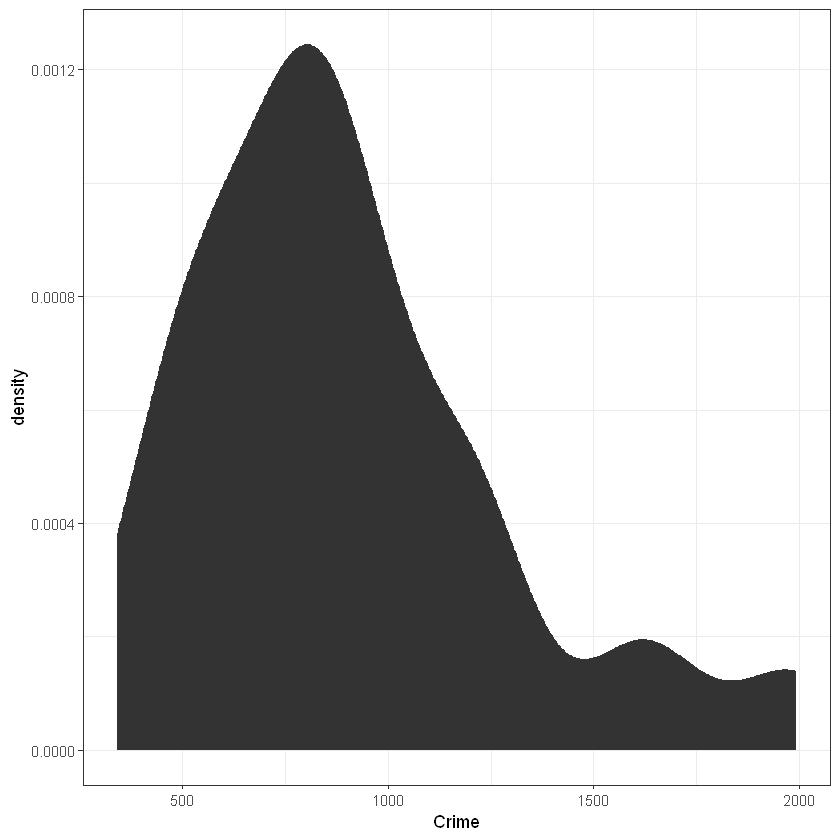

In [17]:
# Graphical summary of our response variable

library(ggplot2)
ggplot(uscrimes, aes(Crime)) + stat_density() + theme_bw()

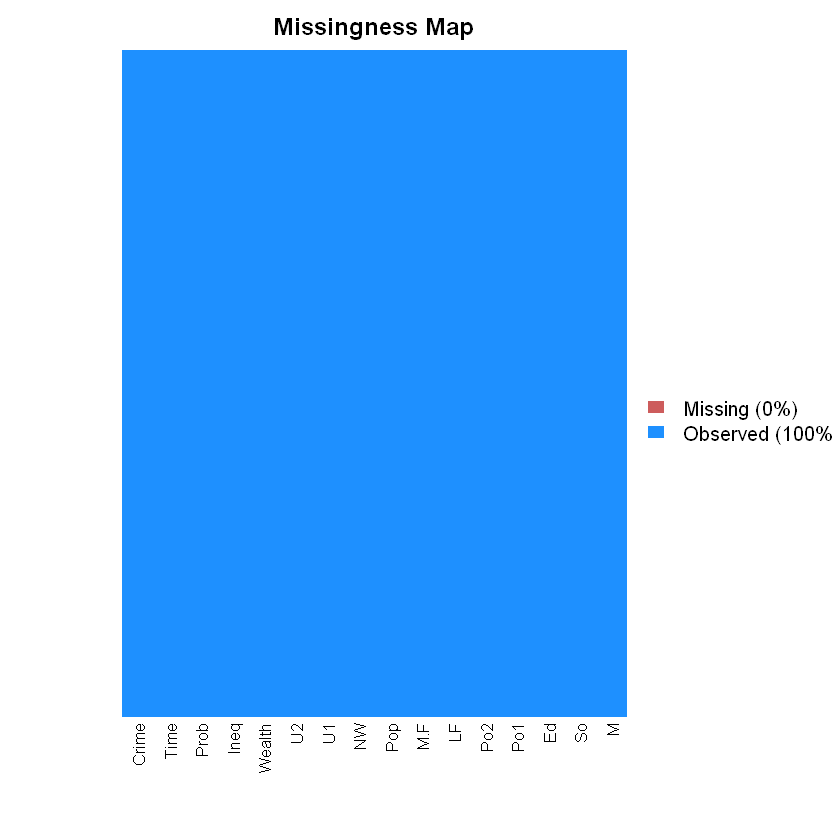

In [28]:
# In this step, I am going to check for missing data. Using mismap function in Amelia package which checks for missing data.
library(Amelia)
missmap(uscrimes, legend = TRUE, col = c("indianred", "dodgerblue"),y.at=1,y.labels='')

##### The figure shows no missing data. Next I am going to check for the correlation of variables. I'm going to buid a correlation plot to show the dependence of the response (Crime) on the different input variables. 


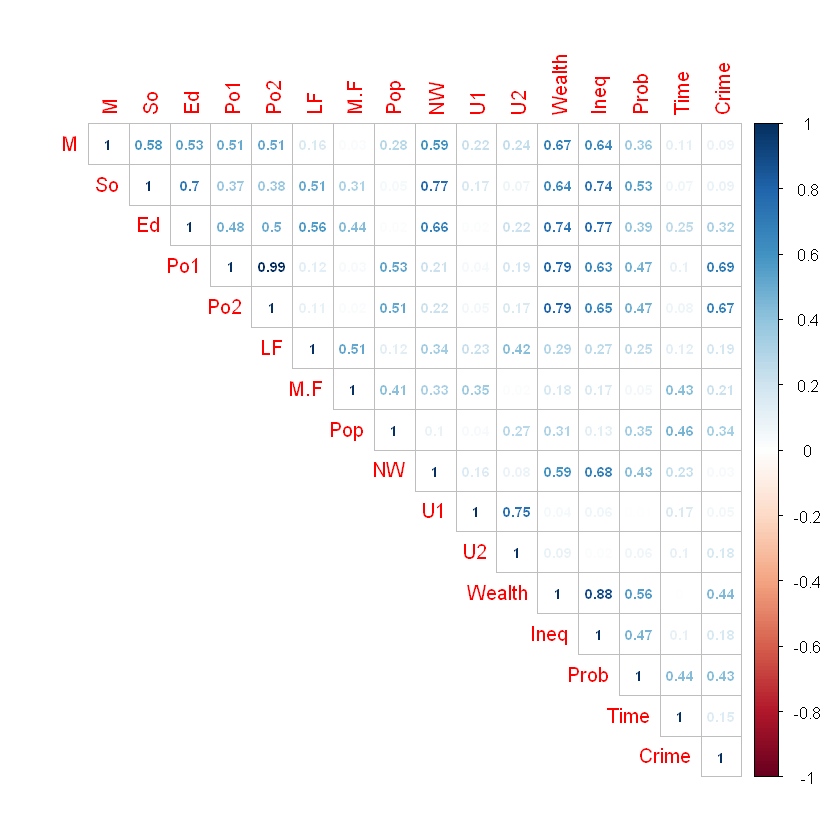

In [43]:
# suppressWarnings(suppressMessages(install.packages("corrplot", repos='http://cran.us.r-project.org')))
suppressWarnings(suppressMessages(library(corrplot)))
corrplot(abs(cor(uscrimes)), method = "number", type = "upper", number.cex = .7)

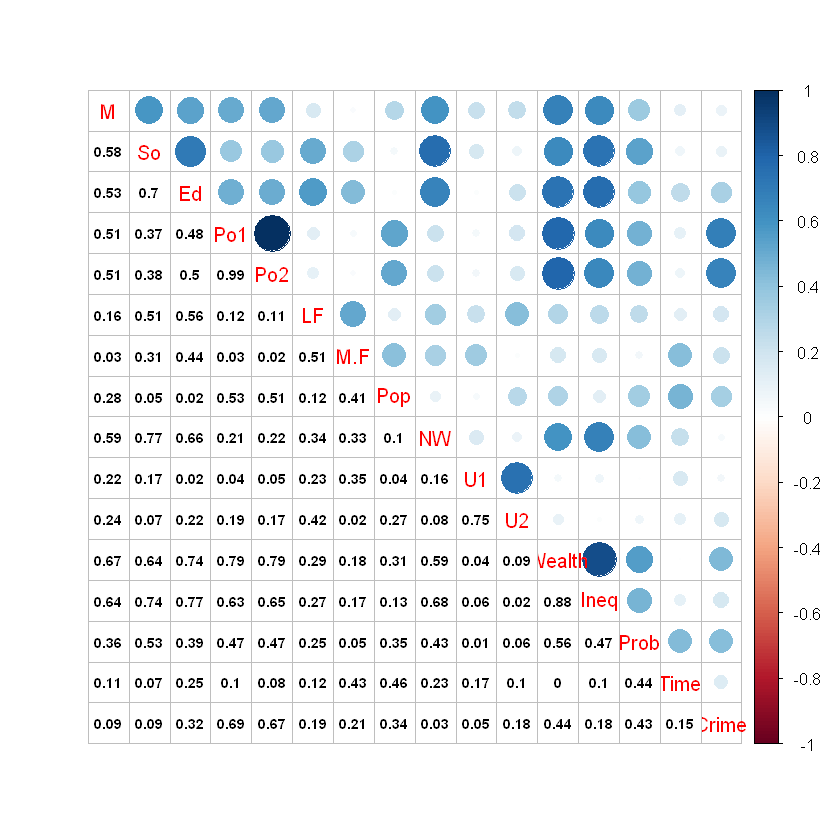

In [44]:
# Another way of representing corrplot, mix of number and circle.
corrplot.mixed(abs(cor(uscrimes)), lower = "number", upper = "circle", lower.col = "black", number.cex = .7)

#### From the corrplot, it can be inferred that Crime response is more dependent on Po1, Po2, Pop, Wealth, Prob, and Ed than on the rest of input data. I am picking all inputs with more than 30% correlation to Crime response.

##### Next, I am going to create a test dataframe that I will use to predict the regression model. The test dataframe inputs the following predictors:
```
M = 14.0
So = 0
Ed = 10.0
Po1 = 12.0
Po2 = 15.5
LF = 0.640
M.F = 94.0
Pop = 150
NW = 1.1
U1 = 0.120
U2 = 3.6
Wealth = 3200
Ineq = 20.1
Prob = 0.04
Time = 39.0

```
##### I am going to fit the regression model with all the predictors. Then I will test the quality of this model by predicting the Crime rate for the baseline dataframe.

In [60]:
baseline_df <- data.frame(M = 14.0,
                          So = 0,
                          Ed = 10.0,
                          Po1 = 12.0,
                          Po2 = 15.5,
                          LF = 0.640,
                          M.F = 94.0,
                          Pop = 150,
                          NW = 1.1,
                          U1 = 0.120,
                          U2 = 3.6,
                          Wealth = 3200,
                          Ineq = 20.1,
                          Prob = 0.040,
                          Time = 39.0
                         )

In [61]:
base_model <- lm(Crime~., data=uscrimes)
summary(base_model)


Call:
lm(formula = Crime ~ ., data = uscrimes)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.74  -98.09   -6.69  112.99  512.67 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.984e+03  1.628e+03  -3.675 0.000893 ***
M            8.783e+01  4.171e+01   2.106 0.043443 *  
So          -3.803e+00  1.488e+02  -0.026 0.979765    
Ed           1.883e+02  6.209e+01   3.033 0.004861 ** 
Po1          1.928e+02  1.061e+02   1.817 0.078892 .  
Po2         -1.094e+02  1.175e+02  -0.931 0.358830    
LF          -6.638e+02  1.470e+03  -0.452 0.654654    
M.F          1.741e+01  2.035e+01   0.855 0.398995    
Pop         -7.330e-01  1.290e+00  -0.568 0.573845    
NW           4.204e+00  6.481e+00   0.649 0.521279    
U1          -5.827e+03  4.210e+03  -1.384 0.176238    
U2           1.678e+02  8.234e+01   2.038 0.050161 .  
Wealth       9.617e-02  1.037e-01   0.928 0.360754    
Ineq         7.067e+01  2.272e+01   3.111 0.003983 ** 
Prob        -4.855

In [63]:
base_model_predict <- predict(base_model, baseline_df)
base_model_predict

1 
155.4349

##### The baseline regression model with all predictors has predicted a crime rate of 155.434896887449. 
### Next, I am going to use only those predictors with more than 30% correlation to Crime rate response. Thus my model is going to include only Po1, Po2, Pop, Wealth, Prob, and Ed (as determined from corrplot).

In [64]:
mod_df <- data.frame(Ed = 10.0,
                     Po1 = 12.0,
                     Po2 = 15.5,
                     Pop = 150,
                     Wealth = 3200,
                     Prob = 0.040
                    )

In [65]:
new_model <- lm(Crime~ + Ed + Po1 + Po2 + Pop + Wealth + Prob, data=uscrimes)
summary(new_model)


Call:
lm(formula = Crime ~ +Ed + Po1 + Po2 + Pop + Wealth + Prob, data = uscrimes)

Residuals:
    Min      1Q  Median      3Q     Max 
-597.05 -133.34   23.56  152.63  578.04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)   532.1121   493.0890   1.079   0.2870  
Ed             64.4792    57.6568   1.118   0.2701  
Po1           277.2720   121.6071   2.280   0.0280 *
Po2          -163.4147   129.6253  -1.261   0.2147  
Pop            -0.9084     1.3658  -0.665   0.5098  
Wealth         -0.2155     0.0932  -2.313   0.0260 *
Prob        -3996.2829  2180.1075  -1.833   0.0742 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 271.8 on 40 degrees of freedom
Multiple R-squared:  0.5705,	Adjusted R-squared:  0.506 
F-statistic: 8.854 on 6 and 40 DF,  p-value: 3.692e-06


In [66]:
new_model_predict <- predict(new_model, mod_df)
new_model_predict

1 
985.4074

### In the next steps, I am going to split the data (80-20) to training and test sets. I am going to create a regression model using training set, and make predictions and test the quality of the model on test sets. I am using caret package for its cross validation functions. 

#### Reference: http://www.sthda.com/english/articles/38-regression-model-validation/157-cross-validation-essentials-in-r/

In [93]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(caret)))


In [87]:
# Split the data into training and test set
set.seed(123)
training.samples <- uscrimes$Crime %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- uscrimes[training.samples, ]
test.data <- uscrimes[-training.samples, ]

# Build the model
model <- lm(Crime~ + Ed + Po1 + Po2 + Pop + Wealth + Prob, data = train.data)

# Make predictions and compute the R2, RMSE and MAE
predictions <- model %>% predict(test.data)
data.frame( R2 = R2(predictions, test.data$Crime),
            RMSE = RMSE(predictions, test.data$Crime),
            MAE = MAE(predictions, test.data$Crime))

R2,RMSE,MAE
0.6226139,210.5413,162.1704


### Cross Validation Methods

#### First, Leave one out cross validation - LOOCV

In [90]:
# Define training control
train.control <- trainControl(method = "LOOCV")
# Train the model
model <- train(Crime~ + Ed + Po1 + Po2 + Pop + Wealth + Prob, data = uscrimes, method = "lm", trControl = train.control)
# Summarize the results
print(model)

Linear Regression 

47 samples
 6 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 46, 46, 46, 46, 46, 46, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  312.7607  0.3615977  231.8999

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Next, K-fold cross-validation

In [91]:
# Define training control
set.seed(123) 
train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(Crime~ + Ed + Po1 + Po2 + Pop + Wealth + Prob, data = uscrimes, method = "lm", trControl = train.control)
# Summarize the results
print(model)

Linear Regression 

47 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 43, 42, 42, 41, 43, 41, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  289.7675  0.5865918  234.0705

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Lastly, Repeated K-fold cross-validation

##### The process of splitting the data into k-folds can be repeated a number of times, this is called repeated k-fold cross validation. The final model error is taken as the mean error from the number of repeats. I am performing 10-fold cross validation with 3 repeats.

In [92]:
# Define training control
set.seed(123)
train.control <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
# Train the model
model <- train(Crime~ + Ed + Po1 + Po2 + Pop + Wealth + Prob, data = uscrimes, method = "lm", trControl = train.control)
# Summarize the results
print(model)

Linear Regression 

47 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 43, 42, 42, 41, 43, 41, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  295.8304  0.5290194  233.3643

Tuning parameter 'intercept' was held constant at a value of TRUE


### The repeated k-fold cv approach gives an R-Squared value of 0.5290194.